# Q2 Gaussian Naive Baye's

In [1]:
import pandas as pd
import numpy as np
from math import*


data = pd.read_csv('/home/nikhil/Documents/Berkeley Courses/Machine-Learning/hw5/wines.csv')

# 1a) sample_data is the normalizzed data array

sample_data = np.zeros((178,13))
for i in range(0,13):
    #sample_data[:,i] = np.true_divide(data.iloc[:,i] -np.mean(data.iloc[:,i]),np.std(data.iloc[:,i]))
    sample_data[:,i] = np.array(data.iloc[:,i])
    
initial_ranks = data.iloc[:,13]
correct_ranks = np.array(data.iloc[:,14])

def calculate_accuracy(model,xs,ys):
    y_pred=np.zeros_like(ys)
    for idx,x in enumerate(xs):
        y_pred[idx]=model.predict(x)
    return np.sum(ys==y_pred)/len(ys)

Q2a) We have chose P(wine attribute x/ cultivar) to be of gaussian form with mean and standard deviation calculated from training data set via usual definition. These mean and standard deviation are chosen as the maximise the log likelihood of probability.

In [2]:
class NaiveBayesClassifier():
    def __init__(self):
        self.type_indices={}#stores indices of wines that belong to each cultivar as boolean array of length 178
        self.type_stats={}#store the mean and std of each cultivar
        self.ndata = 0
        self.trained=False
    
    @staticmethod
    def gaussian(x,mean,std):
        coeff = -0.5*pow((x-mean)/std,2)
        return 1/(std*sqrt(pi*2))*exp(coeff)
    
    @staticmethod
    def calculate_statistics(x_values):
        # Returns a list with length of input features. Each element is a tuple, with the input 
        #feature's average and standard deviation
        n_feats=x_values.shape[1]
        return [(np.average(x_values[:,n]),np.std(x_values[:,n])) for n in range(n_feats)]
    
    @staticmethod
    def calculate_prob(self,x_input,stats):
        """Calculate the probability that the input features belong to a specific class(P(X|C)), 
        defined by the statistics of features in that class
        x_input: np.array shape(nfeatures)
        stats: list of tuple [(mean1,std1),(means2,std2),...]
        """ 
        init_prob = np.zeros(len(x_input))
        stats = np.array(stats)
        for i in range(len(x_input)):
            init_prob[i] = self.gaussian(x_input[i],stats[i,0],stats[i,1])
            #print(init_prob[i])
        return init_prob
    
    def fit(self,xs,ys):
        # Train the classifier by calculating the statistics of different features in each class
        self.ndata = len(ys)
        for y in set(ys):
            type_filter= (ys==y)
            self.type_indices[y]=type_filter
            self.type_stats[y]=self.calculate_statistics(xs[type_filter])
        self.trained=True
        
    def predict(self,xs):
        # Do the prediction by outputing the class that has highest probability
        if len(xs.shape)>1:
            print("Only accepts one sample at a time!")
        if self.trained:
            guess=None
            max_prob=0
            # P(C|X) = P(X|C)*P(C) / sum_i(P(X|C_i)*P(C_i)) (deniminator for normalization only, can be ignored)
            for y_type in self.type_stats:
                p_c = self.type_indices[y_type].sum()/len(self.type_indices[y_type])
                prob= p_c*np.prod(self.calculate_prob(self,xs,self.type_stats[y_type]))
                #print(prob)
                if prob>max_prob: # we want to put the sample in group which has highest probability
                    max_prob=prob
                    guess=y_type
            return guess
        else:
            print("Please train the classifier first!")

In [3]:
from sklearn.model_selection import train_test_split,KFold

def validate(solution,ranks):
    index1 = np.where(ranks==1)[0]
    index2 = np.where(ranks==2)[0]
    index3 = np.where(ranks==3)[0]

    solindex1 = np.where(solution==1)[0]
    solindex2 = np.where(solution==2)[0]
    solindex3 = np.where(solution==3)[0]

    
    ans1 = np.intersect1d(solindex1,index1,return_indices=True)
    ans2 = np.intersect1d(solindex2,index2,return_indices=True)
    ans3 = np.intersect1d(solindex3,index3,return_indices=True)
    
    print("Cultivar 1:" + str(len(ans1[1])) + str("out of ") + str(len(index1)) + " correct")
    print("Cultivar 2:" + str(len(ans2[1])) + str("out of ") + str(len(index2)) + " correct")
    print("Cultivar 3:" + str(len(ans3[1])) + str("out of ") + str(len(index3)) + " correct")

    return "see the print above"


def Kfold(k,Xs,ys):
    # The total number of examples for training the network
    total_num = len(Xs)
    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    # record error for each model
    train_error_all=[]
    test_error_all=[]
    
    for train_selector,test_selector in kf.split(range(total_num)):
        ### Decide training examples and testing examples for this fold ###
        train_Xs= Xs[train_selector]
        test_Xs= Xs[test_selector]
        train_ys= ys[train_selector]
        test_ys= ys[test_selector]
               
        ### Establish the model for gaussian naive bayes here ###
        model= NaiveBayesClassifier()
        
        model.fit(train_Xs,train_ys)
        answers = np.zeros(len(test_ys))
        for i in range(len(answers)):
            answers[i] = model.predict(test_Xs[i,:])
         
        print(answers)
        print(test_ys)
        error =  validate(answers,test_ys)
        print(calculate_accuracy(model,test_Xs,test_ys))
    return model


In [4]:
ans  = Kfold(3,sample_data,correct_ranks)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 3. 3. 3. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 3. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.]
[1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 1 1 1 1 1 1 1 2 2 2
 2 2 2 3 3 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3]
Cultivar 1:22out of 23 correct
Cultivar 2:25out of 25 correct
Cultivar 3:12out of 12 correct
0.9833333333333333
[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1.
 3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.]
[1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3]
Cultivar 1:20out of 20 correct
Cultivar 2:26out of 27 correct
Cultivar 3:12out of 12 correct
0.9830508474576272
[1. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 2. 2. 2. 3. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3.

Compared to the two versions of the classical simulated annealing we used in HW2, accuracy of Naive Baye's is much better. Accuracy here is in high 90s where there it was more like 75%. I guess Gaussian Naive Baye's allows us to reach global minima in some sense.
This result indicates that indeed various attributes are not correlated.

#  Q3 Soft Max and Cross Entropy Loss

In [5]:
from torch import nn
import torch
import matplotlib.pyplot as plt

class perceptron_nosm(nn.Module):
    def __init__(self):
        super(perceptron_nosm,self).__init__()
        self.layers = nn.Sequential(
        nn.Linear(13,3),
        )
        
    def forward(self,x):
        return self.layers(x)

print("output without softmax")
wine_tensor = torch.tensor(sample_data[0])
wine_tensor = wine_tensor.float()
model = perceptron_nosm()
print(model.forward(wine_tensor))


class perceptron(nn.Module):
    def __init__(self):
        super(perceptron,self).__init__()
        self.layers = nn.Sequential(
        nn.Linear(13,3),
        nn.Softmax(dim=0)
        )
        
    def forward(self,x):
        return self.layers(x)
print("output with softmax")
wine_tensor = torch.tensor(sample_data[0])
wine_tensor = wine_tensor.float()
model = perceptron()
print(model.forward(wine_tensor))

output without softmax
tensor([-24.4639, 281.0908,  80.4819], grad_fn=<AddBackward0>)
output with softmax
tensor([1.0000e+00, 8.6429e-19, 0.0000e+00], grad_fn=<SoftmaxBackward0>)


Q3a) The softmax function essentially makes sure that the sum of the output is 1, essentially creating a probability distribution function.

In [6]:
from sklearn.model_selection import train_test_split,KFold
import torch.optim

def transform(ranks):# to trasnform ranks to vector of length 3
    answer = np.zeros((len(ranks),3))
    for i in range(len(ranks)):
        answer[i,int(ranks[i] -1)] = 1
    return answer

def inv_transform(probs):# to transform probs to cultivar
    answer = np.zeros(len(probs))
    for i in range(len(probs)):
        answer[i] = np.argmax(probs[i]) + 1
    return answer    

In [7]:
def train_and_val(model,train_X,train_y,epochs,draw_curve=True):
    """
    Parameters
    --------------
    model: a PyTorch model
    train_X: np.array shape(ndata,nfeatures)
    train_y: np.array shape(ndata)
    epochs: int
    draw_curve: bool
    """
    ### Define your loss function, optimizer. Convert data to torch tensor ###
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
    
    ### Split training examples further into training and validation ###
    train_in,valid_in,train_real,valid_real=train_test_split(train_X,train_y)
    training_real = transform(train_real)
    validate_real = transform(valid_real)
    val_array=[]
    lowest_val_loss = np.inf
    
    for i in range(epochs):
        
        ### Compute the loss and do backpropagation ###
        optimizer.zero_grad()   # zero the gradient buffers
        output = model.forward(torch.FloatTensor(train_in))
        loss = criterion(output, torch.FloatTensor(training_real))
        loss.backward()
        optimizer.step() 
        
        ### compute validation loss and keep track of the lowest val loss ###
        val_err = criterion(model.forward(torch.FloatTensor(valid_in)), torch.FloatTensor(validate_real))
        
        val_array.append(val_err.item())
        if val_err.item() < lowest_val_loss:
             lowest_val_loss = val_err.item()
                
    if draw_curve:
        plt.figure()
        plt.plot(np.arange(len(val_array))+1,val_array,label='Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
                
     # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs=np.argmin(val_array)+1
    print("Number of epochs with lowest validation:",final_epochs)
    ### Recover the model weight ###
    weights = model.parameters()

    return model,weights     

In [8]:
def Kfold_nn(k,Xs,ys,epochs):
    # The total number of examples for training the network
    total_num = len(Xs)
    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    # record error for each model
    train_error_all=[]
    test_error_all=[]
    model= perceptron()
    weights = np.zeros(len(list(model.parameters())))
    
    for train_selector,test_selector in kf.split(range(total_num)):
        ### Decide training examples and testing examples for this fold ###
        train_Xs= Xs[train_selector]        
        test_Xs= Xs[test_selector]
        train_ys= ys[train_selector]
        test_ys= ys[test_selector]
               
        ### Establish the model for gaussian naive bayes here ###
        
        model,weights  = train_and_val(model,train_Xs,train_ys,epochs,draw_curve=True)
        
        answers = inv_transform(model.forward(torch.FloatTensor(test_Xs)).detach().cpu().numpy())
         
        print(answers)
        print(test_ys)

        error =  validate(answers,test_ys)

    return model

Number of epochs with lowest validation: 188
[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 2. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 3.]
[1 1 1 1 1 1 1 2 2 2 2 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3]
Cultivar 1:22out of 22 correct
Cultivar 2:21out of 23 correct
Cultivar 3:3out of 15 correct
Number of epochs with lowest validation: 12422
[1. 1. 2. 1. 2. 2. 1. 1. 1. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 2. 1.
 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 1. 1. 1. 3. 2.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3.]
[1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3]
Cultivar 1:14out of 19 correct
Cultivar 2:22out of 25 correct
Cultivar 3:14out of 15 correct
Number of epochs with lowest validation: 8
[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1

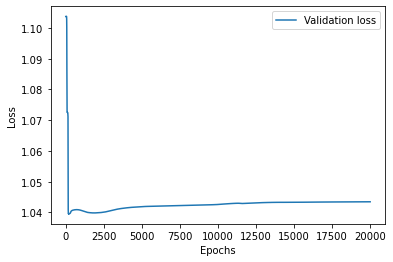

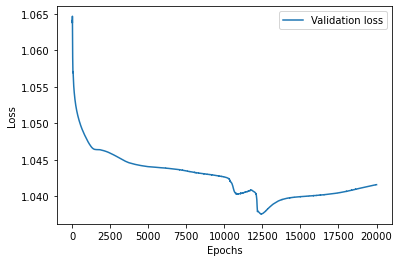

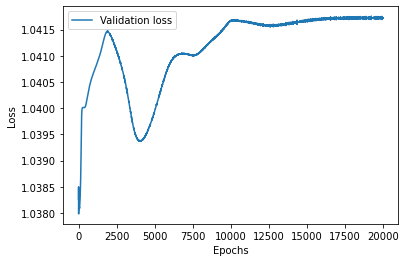

In [9]:
#Q3b)
answer = Kfold_nn(3,sample_data,correct_ranks,20000)

Performance from NN with cross entropy loss is very good, however it is still less successfull than Gaussian naive bayes for the paramteres I have chosen. Perhaps choosing a more appropriate optimizer and number of epochs will lead to a better result.